In [2]:
tensor_transform = transforms.Compose([
    transforms.ToTensor()
])
img_data = torchvision.datasets.ImageFolder('imgs/',
                                           transform = tensor_transform)
data_loader = torch.utils.data.DataLoader(img_data,
                                         batch_size = 4,
                                         shuffle = True)

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [5]:
dataiter = iter(data_loader)
images, labels = dataiter.next()
print(len(images))
print(labels)

4
tensor([3, 1, 0, 0])


In [6]:
classes = ['dress', 'hoody', 'pants', 'skirt', 'socks', 'sweater']
## -- 2는 pants
## -- 0은 dress
## -- 1은 hoody
## -- 3은 skirt
## -- 4는 socks
## -- 5는 sweater

    skirt    /    hoody    /    dress    /    dress


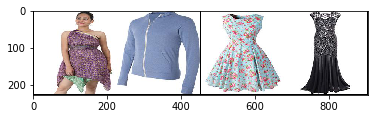

In [7]:
imshow(torchvision.utils.make_grid(images))
print('    ' + '    /    '.join('%5s' % classes[labels[j]] for j in range(4)))

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 53 * 53, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 6)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
#         print(x.shape)
        x = x.view(-1, 16 * 53 * 53)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [10]:
for epoch in range(2):
    running_loss = 0.0
    
    ## trainloader 에서 index 와 data 를 뽑아내어 학습을 진행합니다.
    for i, data in enumerate(data_loader, 0):
        
        # data 에서 feature 와 labels 를 나눠 저장합니다.
        inputs, labels = data
        
        # optimizer 의 가중치를 0으로 초기화 합니다.
        optimizer.zero_grad()
        
        ## forward(전방전파) + backward(역전파) + optimize(최적화) 과정입니다. 
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # 1000개 데이터 단위로 끊어서 loss의 합산을 출력합니다.
        running_loss += loss.item()
        if i % 50 == 0:
            print('[%d, %5d] loss : %.3f' %
                  (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0

print('Finished Training')



[1,     1] loss : 0.002
[1,    51] loss : 0.089
[1,   101] loss : 0.090
[1,   151] loss : 0.090
[1,   201] loss : 0.089
[1,   251] loss : 0.090
[1,   301] loss : 0.089
[1,   351] loss : 0.089
[1,   401] loss : 0.087
[1,   451] loss : 0.084
[1,   501] loss : 0.085
[1,   551] loss : 0.078
[1,   601] loss : 0.081
[1,   651] loss : 0.081
[1,   701] loss : 0.079
[1,   751] loss : 0.077
[1,   801] loss : 0.076
[1,   851] loss : 0.078
[1,   901] loss : 0.075
[1,   951] loss : 0.071
[1,  1001] loss : 0.071
[1,  1051] loss : 0.064
[1,  1101] loss : 0.067
[1,  1151] loss : 0.065
[1,  1201] loss : 0.061
[1,  1251] loss : 0.060
[1,  1301] loss : 0.059
[1,  1351] loss : 0.060
[1,  1401] loss : 0.056
[1,  1451] loss : 0.064
[2,     1] loss : 0.001
[2,    51] loss : 0.049
[2,   101] loss : 0.054
[2,   151] loss : 0.053
[2,   201] loss : 0.050
[2,   251] loss : 0.055
[2,   301] loss : 0.057
[2,   351] loss : 0.056
[2,   401] loss : 0.052
[2,   451] loss : 0.057
[2,   501] loss : 0.052
[2,   551] loss 

In [20]:
dataiter = iter(data_loader)
images, labels = dataiter.next()

GroundTruth:  skirt    /    skirt    /    hoody    /    skirt
Predicted:  skirt    /    skirt    /    hoody    /    skirt


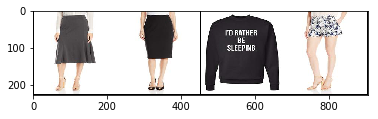

In [21]:
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ','    /    '.join('%5s'% classes[labels[j]] for j in range(4)))

outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ','    /    '.join('%5s'% classes[predicted[j]] for j in range(4)))

In [23]:
correct = 0
total = 0
with torch.no_grad():
    for data in data_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 6,000 test images :%d %%'%(100 * correct / total))

Accuracy of the network on the 10000 test images :71 %


In [29]:
class_correct = list(0. for i in range(6))
class_total = list(0. for i in range(6))
with torch.no_grad():
    for data in data_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        if len(labels) == 4:
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

In [30]:
for i in range(6):
    print('Accuracy of %5s: %2d %%'%(classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of dress: 75 %
Accuracy of hoody: 83 %
Accuracy of pants: 84 %
Accuracy of skirt: 73 %
Accuracy of socks: 80 %
Accuracy of sweater: 30 %
